# Problem Set 1

### Authors: Anita Mezzetti, Franceso Maizza, Hien Lê, Nataliia Surianinova, Zafer Kocaoglu

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem:
You have recently started your job as a Data Scientist in a famous telecom company. As you
may very well know, telecoms fiercely fight for customer retention, with entire service branches
devoted to this task. This is due to the fact that retention is more cost efficient than capturing
new clients. One of your colleagues from the master got hired in the Marketing Department, and
he needs to understand the company’s clients, so he’s asked you to help him out with a descriptive
report and segmentation of the customer base. He’s specially interested in the lifetime value of loyal
customers. Thus, you can ignore (for now) those who leave the company (churn).

Prepare a descriptive report and segment the customers in the most adequate way. For this
assignment, use the data on customers.csv. Clean, organise and present an exploratory analysis
of the data. What can you tell about the customers ?

## 1) Data Loading and Excracting Loyal Customers

First of all we checked the data for the logical mistakes and missing values. There were no logical mistakes and empty values.

Text(0, 0.5, 'Proportion of Customers')

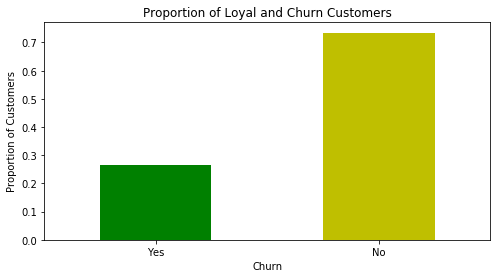

In [2]:
CustomerData = pd.read_csv (r'customers.csv') 

# we delete clients who leave the company (Churn=Yes)
positive_churn = CustomerData.Churn=='Yes' # find customers who leave the company (churn)
negative_churn = CustomerData.Churn=='No'
LoyalCustomerData = CustomerData.drop(CustomerData[positive_churn].index) # delete them from the DataFrame
ChurnCustomerData = CustomerData.drop(CustomerData[negative_churn].index) # delete them from the DataFrame
ChurnGraph = CustomerData['Churn'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(8,4),color=['g','y'] ,title= "Proportion of Loyal and Churn Customers")
ChurnGraph.set_xlabel("Churn")
ChurnGraph.set_ylabel("Proportion of Customers")

As can be seen above, around 26.5% of all customers churned. However, we are only interested in the lifetime value of loyal customers. Hence, we clean data from churned customers and obtain the data of loyal customers.

In [3]:
LoyalCustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [4]:
LoyalCustomerData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

When we look into data types, we see that MonthlyCharges is given as object. Hence, we turn it into float type.

In [5]:
LoyalCustomerData["TotalCharges"] = pd.to_numeric(LoyalCustomerData.TotalCharges, errors='coerce').fillna(0, downcast='infer')
LoyalCustomerData['SeniorCitizen'] = LoyalCustomerData['SeniorCitizen'].map({True: 'Yes', False: 'No'})

## 2) Simple Descriptive Analysis

We can start doing descriptive analysis about customers with the help of organized data. First, we can look into demographic characteristics of the customers. Following analysis can be useful for marketing department when they make promotions.

### 2.1) Demographic Characteristics of Customers

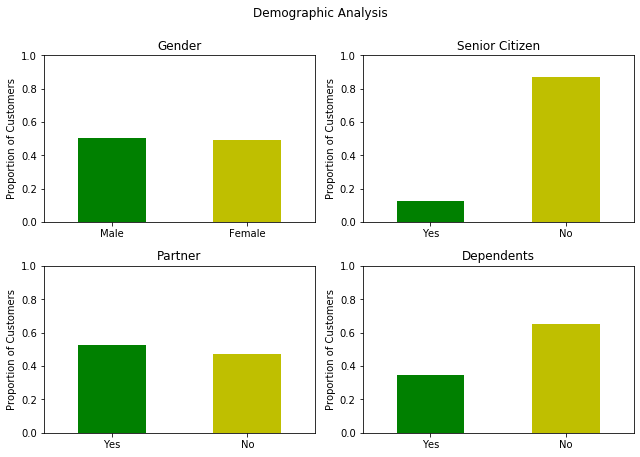

In [6]:
fig, axs = plt.subplots(ncols=2,nrows=2)
axes = axs.flatten()
fig.suptitle('Demographic Analysis',x=0.5,y=1.05)
custom_ylim = (0, 1)
plt.setp(axes, ylim=custom_ylim, ylabel='Proportion of Customers')
LoyalCustomerData['gender'].value_counts(normalize=True).plot(kind='bar',rot=0, figsize=(9,6),color=['g','y'],ax=axes[0] ,title= "Gender")
LoyalCustomerData['SeniorCitizen'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(9,6),color=['g','y'],ax=axes[1] ,title= "Senior Citizen")
LoyalCustomerData['Partner'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(9,6),color=['g','y'],ax=axes[2] ,title= "Partner")
LoyalCustomerData['Dependents'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(9,6),color=['g','y'],ax=axes[3] ,title= "Dependents")

plt.tight_layout()
plt.show()


As can be seen from the graphs given above, loyal customers are divided equally among genders, so there are no dominant gender. Most of the loyal customers are non-senior citizens (younger people). Similarly to gender, there are no dominant group when it comes to having a partner or not. Lastly, majority of the loyal customers doesn't have dependents.

### 2.2) Product Usage of Customers

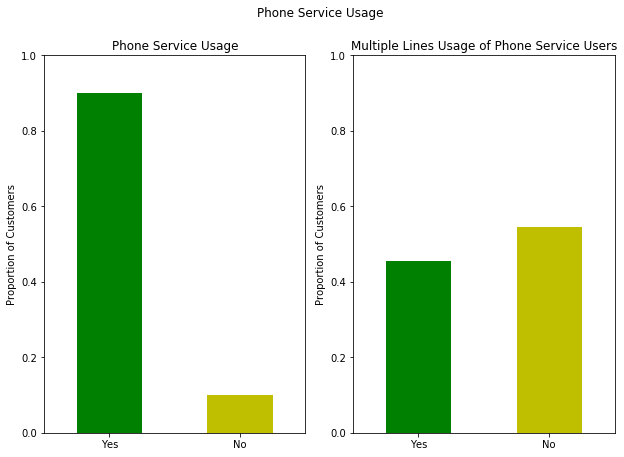

In [7]:
fig, axs = plt.subplots(ncols=2,nrows=1)
axes = axs.flatten()
fig.suptitle('Phone Service Usage',x=0.5,y=1.05)
custom_ylim = (0,1)
plt.setp(axes, ylim=custom_ylim, ylabel='Proportion of Customers')

nophone=LoyalCustomerData.MultipleLines=='No phone service'
LoyalCustomerData1 = LoyalCustomerData.drop(LoyalCustomerData[nophone].index)

LoyalCustomerData['PhoneService'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(9,6),color=['g','y'],ax=axes[0] ,title= "Phone Service Usage") 
LoyalCustomerData1['MultipleLines'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(9,6),color=['g','y'],ax=axes[1] ,title= "Multiple Lines Usage of Phone Service Users")
plt.tight_layout()
plt.show()

When we look at phone service usage, we see that most of the customers are using phone service with more than half of the customers using only one line.

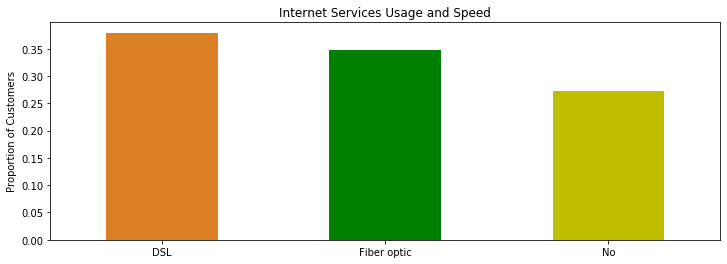

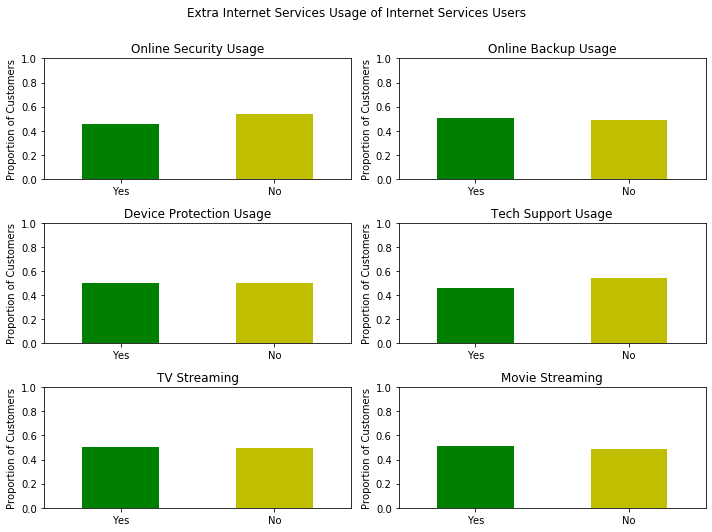

In [8]:
InternetUsage=LoyalCustomerData['InternetService'].value_counts(normalize=True).plot(kind='bar',rot=0 ,figsize=(12,4),color=['#da8025','g','y'],title= "Internet Services Usage and Speed")
InternetUsage.set_ylabel("Proportion of Customers")
fig, axs = plt.subplots(ncols=2,nrows=3)
axes = axs.flatten()
fig.suptitle('Extra Internet Services Usage of Internet Services Users',x=0.5,y=1.05)
custom_ylim = (0, 1)
plt.setp(axes, ylim=custom_ylim, ylabel='Proportion of Customers')

nointernet=LoyalCustomerData.OnlineSecurity=='No internet service'
LoyalCustomerData2 = LoyalCustomerData.drop(LoyalCustomerData[nointernet].index)

LoyalCustomerData2['OnlineSecurity'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[0] ,title= "Online Security Usage")
LoyalCustomerData2['OnlineBackup'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[1] ,title= "Online Backup Usage")
LoyalCustomerData2['DeviceProtection'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[2] ,title= "Device Protection Usage")
LoyalCustomerData2['TechSupport'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[3] ,title= "Tech Support Usage")
LoyalCustomerData2['StreamingTV'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[4] ,title= "TV Streaming")
LoyalCustomerData2['StreamingMovies'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[5] ,title= "Movie Streaming")
plt.tight_layout()
plt.show()

As can be seen from the graphs above, more than 2/3 of loyal customers are using internet services. Number of customers using DSL internet is slightly higher than Fiber Optic users. When we look into Internet users' extra packages, we can see that all extras are used by approximately half of the total internet users. To understand it better, we can also check distribution of extra services based on internet speed (DSL or Fiber Optic).

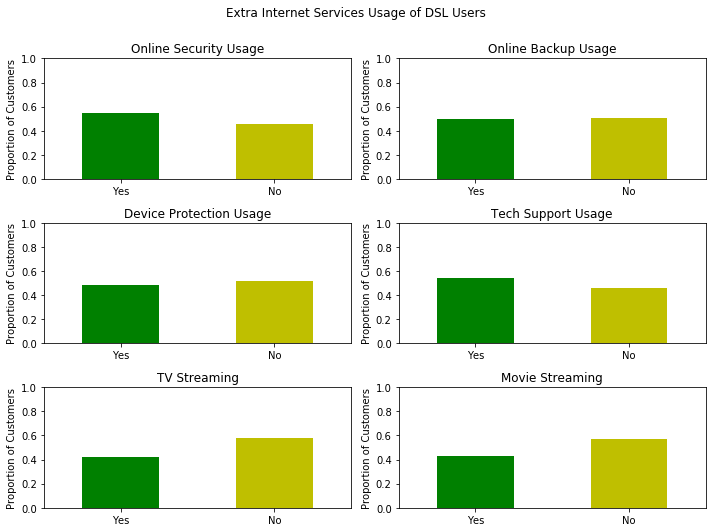

In [9]:
nodsl=LoyalCustomerData2.InternetService=='Fiber optic'
nofiber=LoyalCustomerData2.InternetService=='DSL'
LoyalCustomerData3 = LoyalCustomerData2.drop(LoyalCustomerData2[nodsl].index)
LoyalCustomerData4 = LoyalCustomerData2.drop(LoyalCustomerData2[nofiber].index)

fig, axs = plt.subplots(ncols=2,nrows=3)
axes = axs.flatten()
fig.suptitle('Extra Internet Services Usage of DSL Users',x=0.5,y=1.05)
custom_ylim = (0,1)
plt.setp(axes, ylim=custom_ylim, ylabel='Proportion of Customers')

LoyalCustomerData3['OnlineSecurity'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[0] ,title= "Online Security Usage")
LoyalCustomerData3['OnlineBackup'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[1] ,title= "Online Backup Usage")
LoyalCustomerData3['DeviceProtection'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[2] ,title= "Device Protection Usage")
LoyalCustomerData3['TechSupport'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[3] ,title= "Tech Support Usage")
LoyalCustomerData3['StreamingTV'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[4] ,title= "TV Streaming")
LoyalCustomerData3['StreamingMovies'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[5] ,title= "Movie Streaming")
plt.tight_layout()
plt.show()

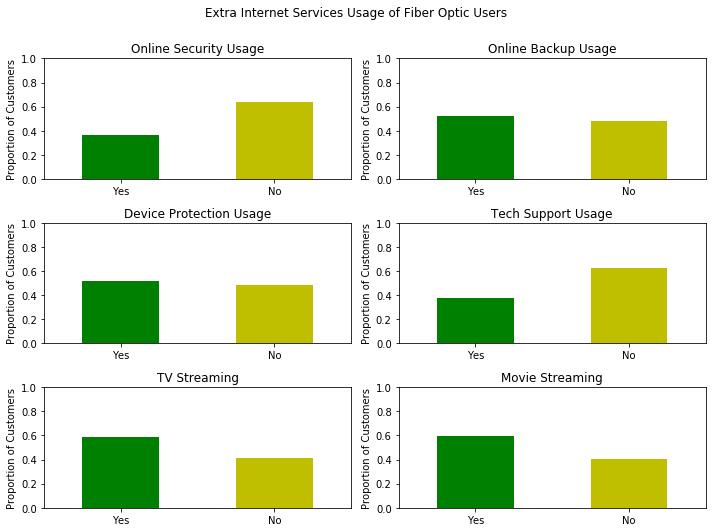

In [10]:
fig, axs = plt.subplots(ncols=2,nrows=3)
axes = axs.flatten()
fig.suptitle('Extra Internet Services Usage of Fiber Optic Users',x=0.5,y=1.05)
custom_ylim = (0, 1)
plt.setp(axes, ylim=custom_ylim, ylabel='Proportion of Customers')

LoyalCustomerData4['OnlineSecurity'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[0] ,title= "Online Security Usage")
LoyalCustomerData4['OnlineBackup'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[1] ,title= "Online Backup Usage")
LoyalCustomerData4['DeviceProtection'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[2] ,title= "Device Protection Usage")
LoyalCustomerData4['TechSupport'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[3] ,title= "Tech Support Usage")
LoyalCustomerData4['StreamingTV'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[4] ,title= "TV Streaming")
LoyalCustomerData4['StreamingMovies'].value_counts(normalize=True).reindex(["Yes", "No"]).plot(kind='bar',rot=0, figsize=(10,7),color=['g','y'],ax=axes[5] ,title= "Movie Streaming")

plt.tight_layout()
plt.show()

When we look into extra services of DSL users and Fiber optic users, first thing we realize is that proportion of TV & Movie streaming users is higher for Fiber optic users. This might be a result of slow DSL internet. One other thing that might be important is that Online Security and Tech Support usage is higher for DSL users. For now, it is just an assumption but it might be due to more Senior citizens (older people) using more DSL internet (We will look into it later). Now, we can analyze extra services;

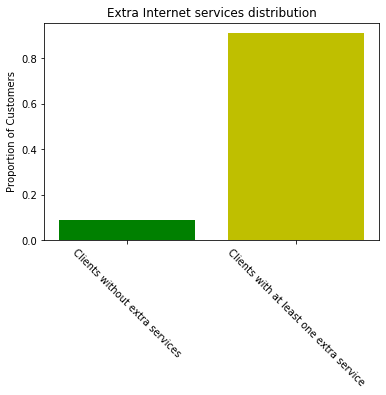

In [11]:
nothing = 0
for i in LoyalCustomerData2.index :
    if (LoyalCustomerData2.OnlineSecurity[i] == 'No') and (LoyalCustomerData2.OnlineBackup[i] == 'No') and (LoyalCustomerData2.DeviceProtection[i] == 'No') and (LoyalCustomerData2.TechSupport[i] == 'No') and (LoyalCustomerData2.StreamingTV[i] == 'No') and (LoyalCustomerData2.StreamingMovies[i] == 'No'):
        nothing = nothing+1
nothingratio = nothing/len(LoyalCustomerData2.OnlineSecurity) 
somethingratio = 1-nothingratio
labels = ['Clients without extra services', 'Clients with at least one extra service']
ratio = [nothingratio,somethingratio]
plt.bar(labels, ratio, align='center',color = ['g','y'], alpha = 1)
plt.xticks(rotation=315)
plt.ylabel('Proportion of Customers')
plt.title('Extra Internet services distribution')
plt.show()

We can see that the majority of clients using Internet also uses extra Internet services

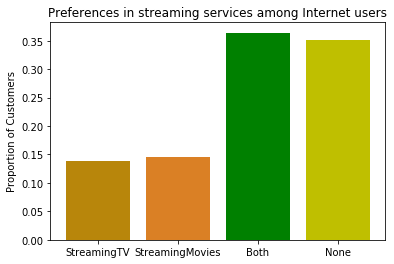

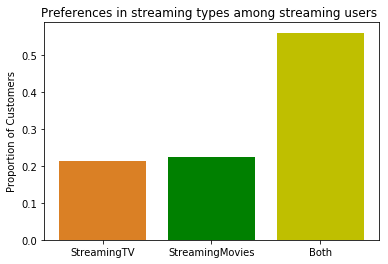

In [12]:
tv = 0
mov = 0
both = 0
none = 0
for i in LoyalCustomerData2.index:
    if (LoyalCustomerData2.StreamingTV[i] == 'Yes') and (LoyalCustomerData2.StreamingMovies[i] != 'Yes'):
        tv = tv+1
    elif (LoyalCustomerData2.StreamingMovies[i] == 'Yes') and (LoyalCustomerData2.StreamingTV[i] != 'Yes'):
        mov = mov+1
    elif (LoyalCustomerData2.StreamingTV[i] == 'Yes') and (LoyalCustomerData2.StreamingMovies[i] == 'Yes'):
        both = both+1
    elif (LoyalCustomerData2.StreamingTV[i] != 'Yes') and (LoyalCustomerData2.StreamingMovies[i] != 'Yes'):
        none = none+1
        
summ = tv+mov+both+none
tv = tv/summ
mov = mov/summ
both = both/summ
none = none/summ
answer = [tv,mov,both,none]
labels = ['StreamingTV','StreamingMovies','Both', 'None']
plt.bar(labels, answer, align='center', color = ['#B8860B','#da8025','g','y'],alpha = 1)
plt.ylabel('Proportion of Customers')
plt.title('Preferences in streaming services among Internet users')
plt.show()

summ1 = tv+mov+both
tv = tv/summ1
mov = mov/summ1
both = both/summ1
answer = [tv,mov,both]
labels = ['StreamingTV','StreamingMovies','Both']
plt.bar(labels, answer, align='center', color = ['#da8025','g','y'],alpha = 1)
plt.ylabel('Proportion of Customers')
plt.title('Preferences in streaming types among streaming users ')
plt.show()

From this graphs we can see that the majority of using streming services clients prefer having both TV and Movie streaming rather than have one. Also we see that among clients using Internet the largest proportions have clinets with both options and without any streaming.  


### 2.3) Contract and value analysis 

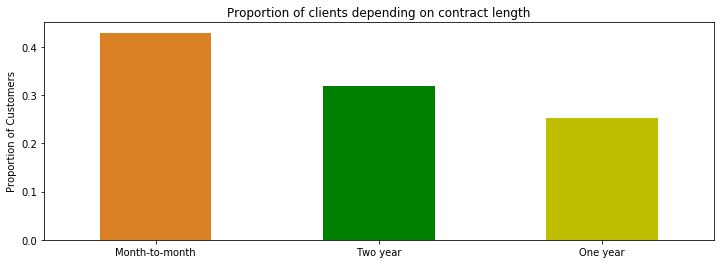

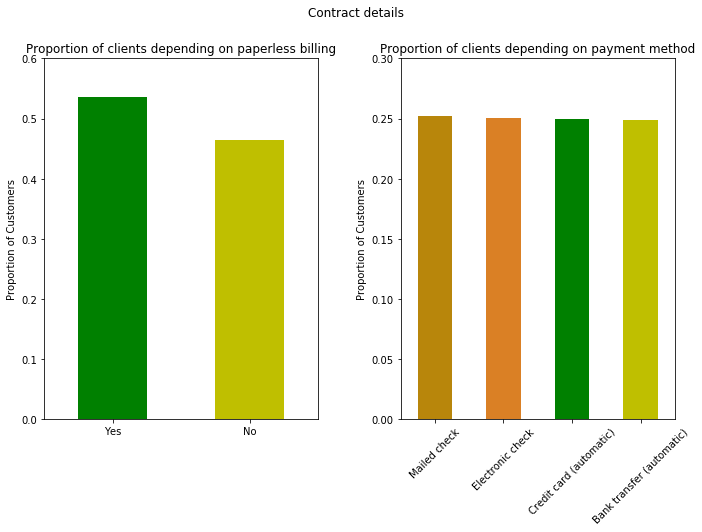

In [13]:
Contracttype=LoyalCustomerData['Contract'].value_counts(normalize = True).plot(kind='bar',rot=0 ,figsize=(12,4),color=['#da8025','g','y'],title= "Proportion of clients depending on contract length")
Contracttype.set_ylabel("Proportion of Customers")
fig, axs = plt.subplots(ncols=2,nrows=1)
axes = axs.flatten()
fig.suptitle('Contract details',x=0.5,y=1.05)
plt.setp(axes, ylim=custom_ylim, ylabel='Proportion of Customers')
custom_ylim = (0, 1)
LoyalCustomerData['PaperlessBilling'].value_counts(normalize = True).reindex(["Yes", "No"]).plot(kind='bar',rot=0,ylim = (0,0.6), figsize=(10,7),color=['g','y'],ax=axes[0] ,title= "Proportion of clients depending on paperless billing")
LoyalCustomerData['PaymentMethod'].value_counts(normalize=True).plot(kind='bar',rot=45,ylim = (0,0.3), figsize=(10,7),color=['#B8860B','#da8025','g','y'],ax=axes[1] ,title= "Proportion of clients depending on payment method")

plt.tight_layout()
plt.show()

We can see that the most used type of contract is a month-to-month contract. The ratio of usage of paperless billing is approximately the same. Also the different types of payment methods are equally distributed among all clients.

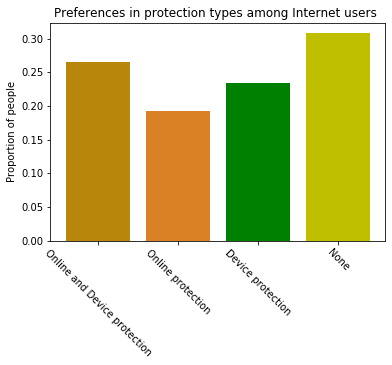

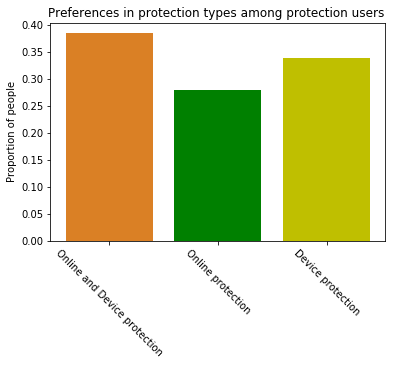

In [14]:
OnD = 0 
O = 0
D = 0
none = 0
for i in LoyalCustomerData2.index:
    if (LoyalCustomerData2.OnlineSecurity[i] == 'Yes') and (LoyalCustomerData2.DeviceProtection[i] == 'Yes'): 
        OnD += 1
    elif (LoyalCustomerData2.OnlineSecurity[i] == 'Yes') and (LoyalCustomerData2.DeviceProtection[i] == 'No'): 
        O += 1
    elif (LoyalCustomerData2.OnlineSecurity[i] == 'No') and (LoyalCustomerData2.DeviceProtection[i] == 'Yes'): 
        D += 1
    elif (LoyalCustomerData2.OnlineSecurity[i] == 'No') and (LoyalCustomerData2.DeviceProtection[i] == 'No'): 
        none += 1
       
summ2 = OnD+O+D+none
OnD = OnD/summ2
O = O/summ2
D = D/summ2
none = none/summ2
answer = [OnD,O,D,none]
labels = ['Online and Device protection','Online protection','Device protection','None']
plt.bar(labels, answer, align='center', color = ['#B8860B','#da8025','g','y'],alpha = 1)
plt.ylabel('Proportion of people')
plt.xticks(rotation=315)
plt.title('Preferences in protection types among Internet users ')
plt.show()

summ2 = OnD+O+D
OnD = OnD/summ2
O = O/summ2
D = D/summ2
answer = [OnD,O,D]
labels = ['Online and Device protection','Online protection','Device protection']
plt.bar(labels, answer, align='center', color = ['#da8025','g','y'],alpha = 1)
plt.ylabel('Proportion of people')
plt.xticks(rotation=315)
plt.title('Preferences in protection types among protection users ')
plt.show()

From these graphs we can see that Internet user clients prefer to use protection and the majority of clients using protection prefers both types of protection.

### 2.4) Tenure analysis

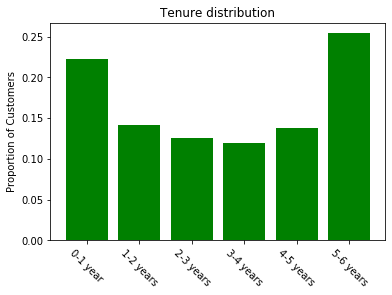

In [15]:
year1 = 0
year2 = 0
year3 = 0
year4 = 0
year5 = 0
year6 = 0

for i in LoyalCustomerData.index :
    if (LoyalCustomerData.tenure[i]/12 <= 1):
        year1 = year1+1
    elif (LoyalCustomerData.tenure[i]/12 <= 2):
        year2 = year2+1
    elif (LoyalCustomerData.tenure[i]/12 <= 3):
        year3 = year3+1
    elif (LoyalCustomerData.tenure[i]/12 <= 4):
        year4 = year4+1
    elif (LoyalCustomerData.tenure[i]/12 <= 5):
        year5 = year5+1
    elif (LoyalCustomerData.tenure[i]/12 <= 6):
        year6 = year6+1
summ = year1+year2+year3+year4+year5+year6
year1 = year1/summ
year2 = year2/summ
year3 = year3/summ
year4 = year4/summ
year5 = year5/summ
year6 = year6/summ

years = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years']
performance = [year1,year2,year3,year4,year5,year6]
plt.bar(years, performance, align='center', alpha = 1,color='g')
plt.xticks(rotation=315)
plt.ylabel('Proportion of Customers')
plt.title('Tenure distribution')
plt.show()

We can see that the largest proportions of clients are with tenure of less than 1 year and between 5 and 6 years. 

## 3) Detailed Data Analysis

At this part, we analyze data more detailed. We inspect the distribution of some important variables and correlation between different variables to understand customer behaviour.

### 3.1) Distribution of Some Important Variables

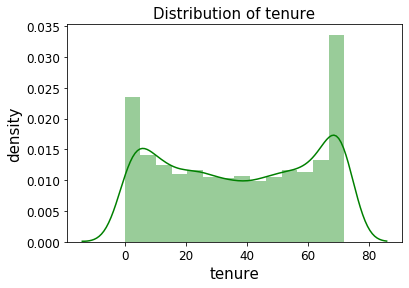

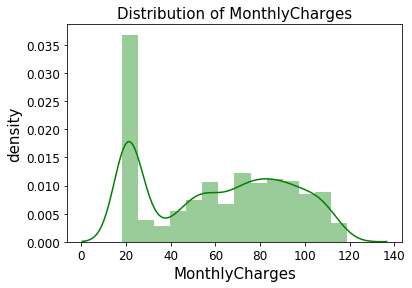

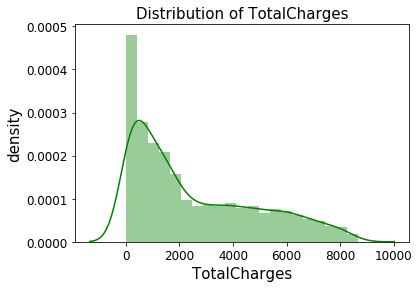

In [16]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(6,4))
    sns.distplot(LoyalCustomerData[col],color='g')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("density", fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=15)

As can be seen from the distribution graphs, customers that are not churned have mostly long-term tenure or short-term tenure. Customers' monthly charges are concentrated on lower amounts and medium amounts. Lastly, Total Charges have more probability on lower amounts.

Text(0.5, 1.0, 'Distribution of MonthlyCharges among only phone users')

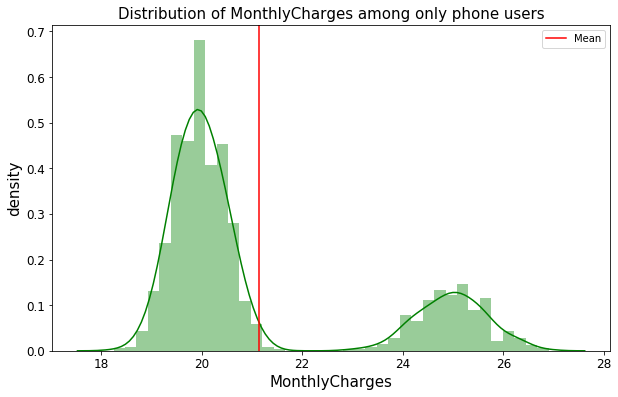

In [17]:
PhoneAndInternet = LoyalCustomerData1.InternetService != 'No'
OnlyPhoneCustomers = LoyalCustomerData1.drop(LoyalCustomerData1[PhoneAndInternet].index)
meanphone=OnlyPhoneCustomers['MonthlyCharges'].mean()
col = 'MonthlyCharges'
plt.figure(figsize=(10,6))
sns.distplot(OnlyPhoneCustomers[col],color='g')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(meanphone, color='r', linestyle='-')
plt.legend({'Mean':meanphone})
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among only phone users", fontsize=15)

As can be seen from the monthly charge distribution graph above, only phone service users are at the lowest bracket of monthly charges with maximum monthly charge is around 28 and mean around 21.

Text(0.5, 1.0, 'Distribution of MonthlyCharges among only internet users (Only DSL users in this case))')

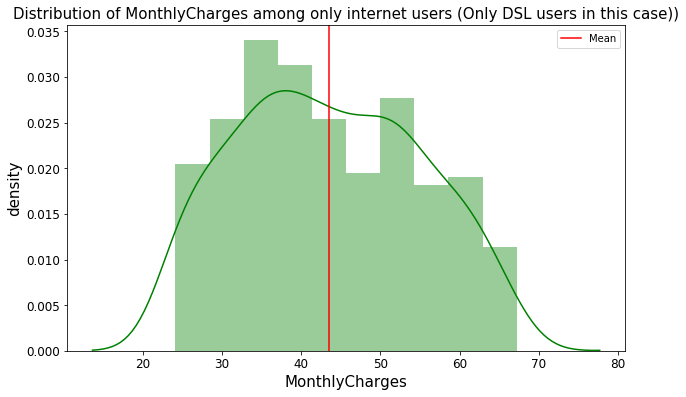

In [18]:
PhoneAndInternet1 = LoyalCustomerData2.PhoneService != 'No'
OnlyInternetCustomers = LoyalCustomerData2.drop(LoyalCustomerData2[PhoneAndInternet1].index)
meaninternet=OnlyInternetCustomers['MonthlyCharges'].mean()
col = 'MonthlyCharges'
plt.figure(figsize=(10,6))
sns.distplot(OnlyInternetCustomers[col],color='g')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(meaninternet, color='r', linestyle='-')
plt.legend({'Mean':meaninternet})
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among only internet users (Only DSL users in this case))", fontsize=15)

Here, we see that monthly charges of only internet users are much more higher than only phone users with mean around 45. This might be useful for marketing department since lifetime value of internet users would be higher. When we go deep and analyze data, we see that if customers don't have phone service they also don't use fiber optics. Hence, only DSL users are paying around 45 in average.

### 3.2) Multivariate Analysis of Variables

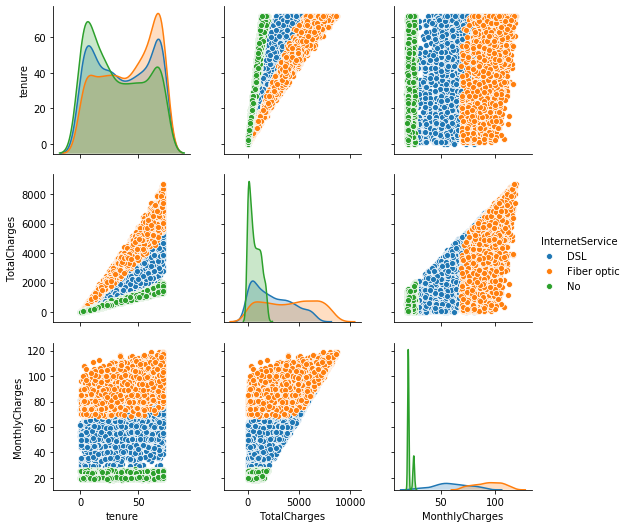

In [19]:
sns.pairplot(LoyalCustomerData, vars=["tenure", "TotalCharges", "MonthlyCharges"], hue="InternetService")

Here we can see a clear clustering of customers, as type of internet service changes, monthly and total charges changes. We can see that fiber optics users's tenure make a peak at long term and no internet service users's tenure peaks at short term. Moreover, fiber optics users pay higher amounts monthly compared to DSL and no internet users. Hence, their total charges and life time values are higher than other 2 groups. Consequently, marketing team should try to keep fiber optics user and convert other types of user to fiber optic.

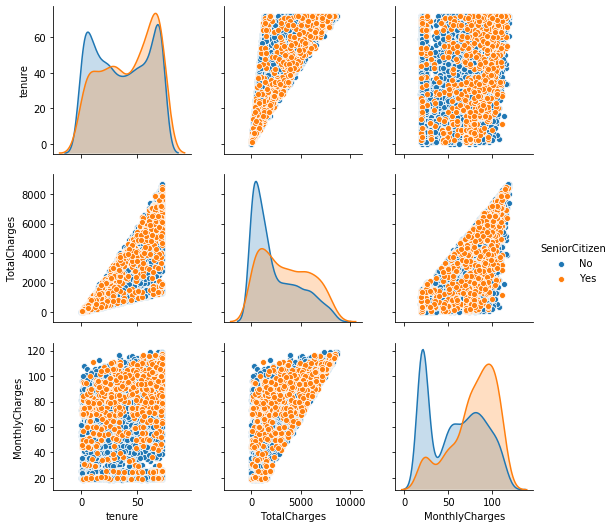

In [20]:
sns.pairplot(LoyalCustomerData, vars=["tenure", "TotalCharges", "MonthlyCharges"], hue="SeniorCitizen")

From this graph we can see that, senior citizens have higher monthly spending compared to young customers. This might be related to extra internet services they use.

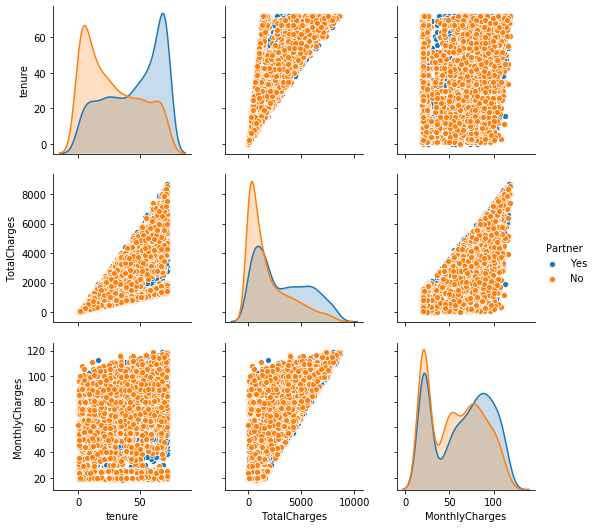

In [21]:
sns.pairplot(LoyalCustomerData, vars=["tenure", "TotalCharges", "MonthlyCharges"], hue="Partner")

From the graph above, we can say that customers who have a partner usually stays longer with the company.

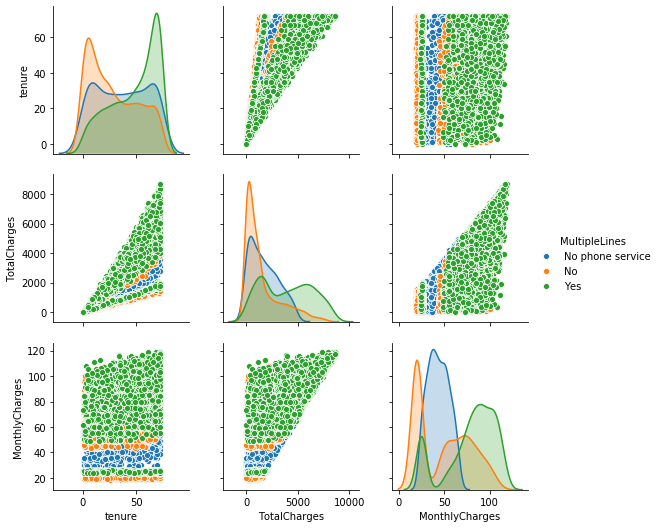

In [22]:
sns.pairplot(LoyalCustomerData, vars=["tenure", "TotalCharges", "MonthlyCharges"], hue="MultipleLines")

Lastly, from the graph above, we can see that multiple line users spend higher amounts and stay longer with the company.